In [1]:
import sys
sys.path.append("D:/MSc_Arbeit/model_comparison_codes")
import importlib

import read_in_arome
import read_icon_model_3D
import read_ukmo
importlib.reload(read_icon_model_3D)
import read_wrf_helen
importlib.reload(read_wrf_helen)
import confg
import dask
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from colorspace import diverging_hcl
import tarfile

In [2]:
lat_ibk = 47.259998
lon_ibk = 11.384167
pal1 = diverging_hcl(palette = "Blue-Red 2")

## AROME

In [31]:
arome = read_in_arome.read_3D_variables_AROME(variables=["th", "z"], method="sel", lat=lat_ibk, lon=lon_ibk)
arome

<xarray.Dataset> Size: 33kB
Dimensions:    (time: 45, nz: 90)
Coordinates:
  * time       (time) datetime64[ns] 360B 2017-10-15T14:00:00 ... 2017-10-16T...
    latitude   float32 4B 47.26
    longitude  float32 4B 11.39
  * nz         (nz) float32 360B 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
Data variables:
    th         (time, nz) float32 16kB 996.0 567.7 514.4 ... 298.0 298.1 298.3
    z          (time, nz) float32 16kB 3.43e+04 2.344e+04 ... 638.9 627.9
Attributes:
    NCO:          netCDF Operators version 4.9.7 (Homepage = http://nco.sf.ne...
    history:      created by B. Wibmer on 2023-11-29 12:32:56
    description:  AROME model output for TEAMx CAP model intercomparison study
    institution:  GeoSphere Austria and ACINN (University of Innsbruck, Austria)

In [39]:
arome_pot_temp = arome.th.isel(nz = np.arange(40, 90))
arome_pot_temp

<xarray.DataArray 'th' (time: 45, nz: 50)> Size: 9kB
array([[310.6233 , 309.97266, 309.40552, ..., 301.65698, 301.68945,
        301.802  ],
       [310.70093, 310.0232 , 309.44775, ..., 301.81934, 301.83936,
        301.92505],
       [310.8225 , 310.09497, 309.4536 , ..., 301.85425, 301.8601 ,
        301.87427],
       ...,
       [310.80493, 310.26538, 309.78784, ..., 296.92017, 297.00293,
        297.22754],
       [310.75757, 310.2124 , 309.7444 , ..., 297.5149 , 297.5962 ,
        297.8164 ],
       [310.73926, 310.2019 , 309.72363, ..., 298.03198, 298.1101 ,
        298.32544]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 360B 2017-10-15T14:00:00 ... 2017-10-16T...
    latitude   float32 4B 47.26
    longitude  float32 4B 11.39
  * nz         (nz) float32 200B 41.0 42.0 43.0 44.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:    kelvin

Text(0.5, 0, '')

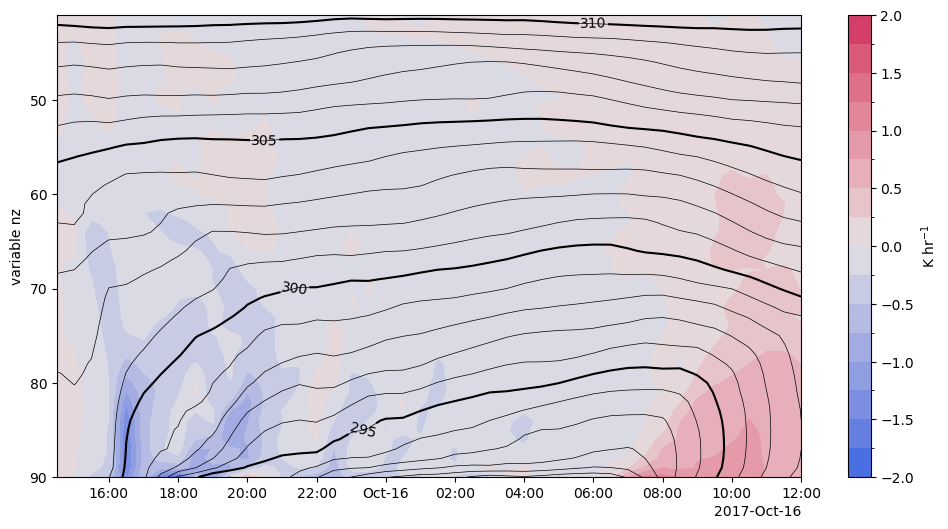

In [40]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours
contourf = arome_pot_temp.diff("time").plot.contourf(ax=ax, x="time", y="nz", levels=20,
                                     cmap=pal1.cmap(), add_colorbar=False)

# Plot the contour lines
contour1 = arome_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="nz", 
                                   levels=np.arange(np.round(arome_pot_temp.min()), np.round(arome_pot_temp.max()), 1), 
                                   colors='black', linewidths=0.5)
contour5 = arome_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="nz", 
                                   levels=np.arange(295, np.round(arome_pot_temp.max()), 5), 
                                   colors='black', linewidths=1.5)
ax.clabel(contour5)
ax.invert_yaxis()
# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('K hr$^{-1}$')
ax.set_title("")
ax.set_ylabel("variable nz"); ax.set_xlabel("")

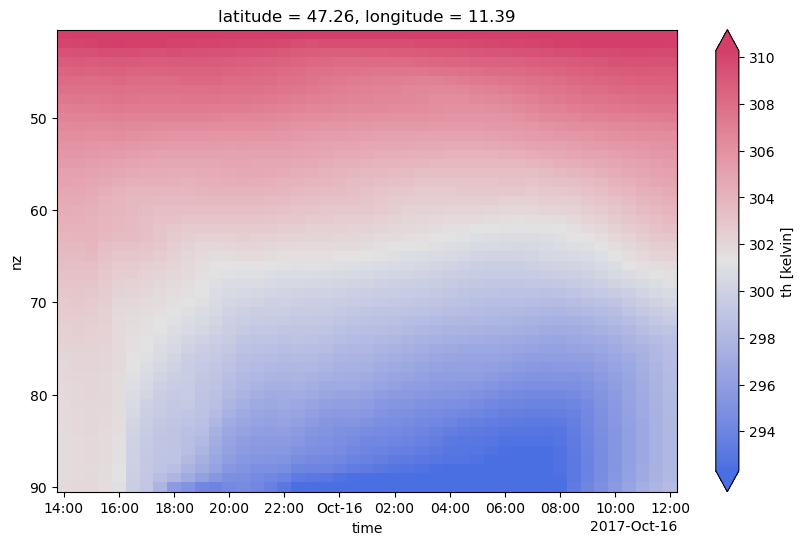

In [36]:
arome.th.isel(nz = np.arange(40, 90)).plot(robust=True, x = "time", y = "nz", figsize=(10, 6), 
                                                          cmap = pal1.cmap())
plt.gca().invert_yaxis()
#plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
#plt.legend()

# ICON

In [3]:
icon15 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 18), lon = 11.4011756, 
                                                                              lat = 47.266076, variant = "ICON") 

In [11]:
icon15 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756, 
                                                                              lat = 47.266076, variant = "ICON") 
icon16 = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON")

In [12]:
variables = ["th", "temp", "pres", "z_ifc", "Td"]  # "temp", "pres", "u", "v", "w",
icon = xr.concat([icon15[variables], icon16[variables]], dim = "time")

In [13]:
icon

<xarray.Dataset> Size: 47kB
Dimensions:   (time: 25, height: 90, height_3: 91)
Coordinates:
    clon      float32 4B 0.1989
    clat      float32 4B 0.825
  * time      (time) datetime64[ns] 200B 2017-10-15T12:00:00 ... 2017-10-16T1...
  * height    (height) float64 720B 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_3  (height_3) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Data variables:
    th        (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    temp      (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    pres      (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
    z_ifc     (time, height_3) float32 9kB dask.array<chunksize=(1, 91), meta=np.ndarray>
    Td        (time, height) float32 9kB dask.array<chunksize=(1, 90), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          655488b8-6e60-ac09-a653-9b1ce37a2b20
    uuidOfVGrid:          5210aca5-6684-c009-3731-0a31182a3180
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@1638fcbef3269d...
    history:              /work/bb1096/b380910/models/icon/icon-nwp_2TE//bin/...
    references:           see MPIM/DWD publications
    comment:              Julian Quimbayo-Duarte (b380910) on l30537 (Linux 4...

In [15]:
icon_pot_temp = icon.th.isel(height = np.arange(40, 90))

Text(0.5, 0, '')

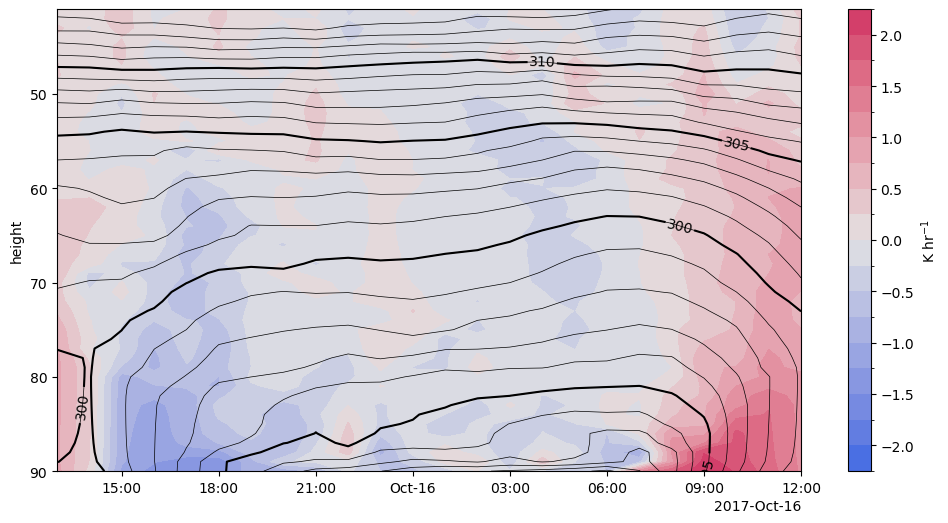

In [16]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours
contourf = icon_pot_temp.diff("time").plot.contourf(ax=ax, x="time", y="height", levels=20,
                                     cmap=pal1.cmap(), add_colorbar=False)

# Plot the contour lines
contour1 = icon_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="height", 
                                   levels=np.arange(np.round(icon_pot_temp.min()), np.round(icon_pot_temp.max()), 1), 
                                   colors='black', linewidths=0.5)
contour5 = icon_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="height", 
                                   levels=np.arange(295, np.round(icon_pot_temp.max()), 5), 
                                   colors='black', linewidths=1.5)
ax.invert_yaxis()
ax.clabel(contour5)
# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('K hr$^{-1}$')
ax.set_title("")
ax.set_ylabel("height"); ax.set_xlabel("")

C:\Users\eleme\.conda\envs\msc\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


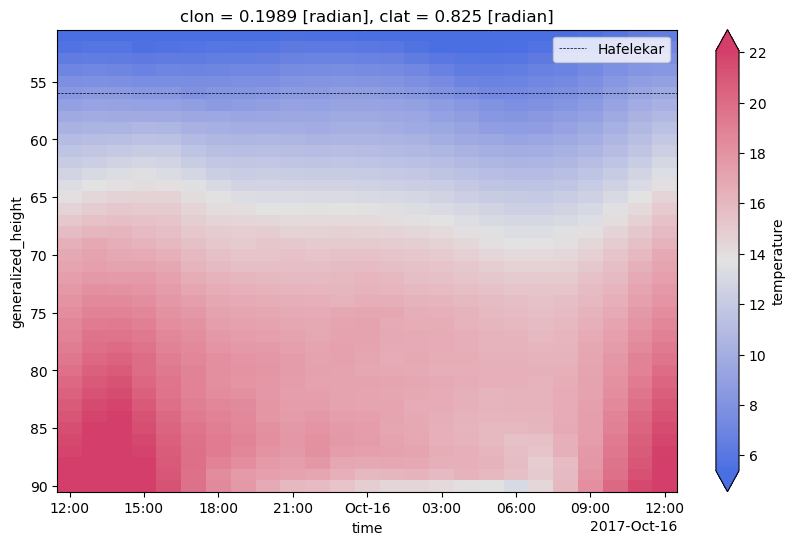

In [26]:
icon.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "height", figsize=(10, 6), 
                                                          cmap = pal1.cmap())
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

## Icon2TE

In [72]:
icon15_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 15, hours = range(12, 24), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")
icon16_2te = read_icon_model_3D.read_icon_fixed_point_multiple_hours(day = 16, hours = range(00, 13), lon = 11.4011756,
                                                 lat = 47.266076, variant = "ICON2TE")

In [73]:
variables = ["temperature", "pressure", "temp", "pres", "u", "v", "w"]
icon2te = xr.concat([icon15_2te[variables], icon16_2te[variables]], dim = "time")

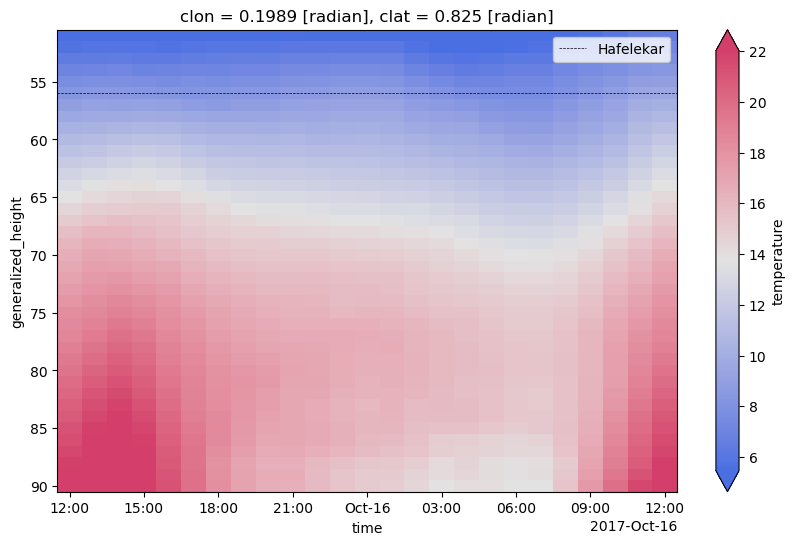

In [113]:
icon2te.temperature.isel(height = np.arange(50, 90)).plot(robust=True, x = "time", y = "height", figsize=(10, 6), 
                                                          cmap = pal1.cmap())
plt.gca().invert_yaxis()
plt.axhline(y = 56, color = 'k', linewidth = 0.5, linestyle = 'dashed', label = "Hafelekar")  
plt.legend()

# UKMO

In [69]:
um = read_ukmo.read_ukmo_fixed_point(lat=47.266076, lon=11.4011756)

In [70]:
um  # this way we have a problem with the dimensions...

<xarray.Dataset> Size: 90kB
Dimensions:                     (time: 45, model_level_number: 70)
Coordinates:
  * time                        (time) datetime64[ns] 360B 2017-10-15T14:00:0...
  * model_level_number          (model_level_number) int32 280B 1 2 3 ... 69 70
    grid_latitude               float32 4B -0.036
    grid_longitude              float64 8B 360.0
    forecast_period             (time) timedelta64[ns] 360B ...
    forecast_reference_time     datetime64[ns] 8B ...
    level_height                (model_level_number) float32 280B ...
    projection_x_coordinate     float64 8B ...
    projection_y_coordinate     float64 8B ...
    sigma                       (model_level_number) float32 280B ...
Data variables:
    transformed_x_wind          (time, model_level_number) float32 13kB ...
    latitude_longitude          int32 4B ...
    level_height_bnds           (model_level_number) float32 280B ...
    sigma_bnds                  (model_level_number) float32 280B ...
    transformed_y_wind          (time, model_level_number) float32 13kB ...
    upward_air_velocity         (time, model_level_number) float32 13kB ...
    rotated_latitude_longitude  int32 4B ...
    geopotential_height         (time, model_level_number) float32 13kB ...
    air_potential_temperature   (time, model_level_number) float32 13kB ...
    specific_humidity           (time, model_level_number) float32 13kB ...
    air_pressure                (time, model_level_number) float32 13kB ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   12.0
    Conventions:  CF-1.7

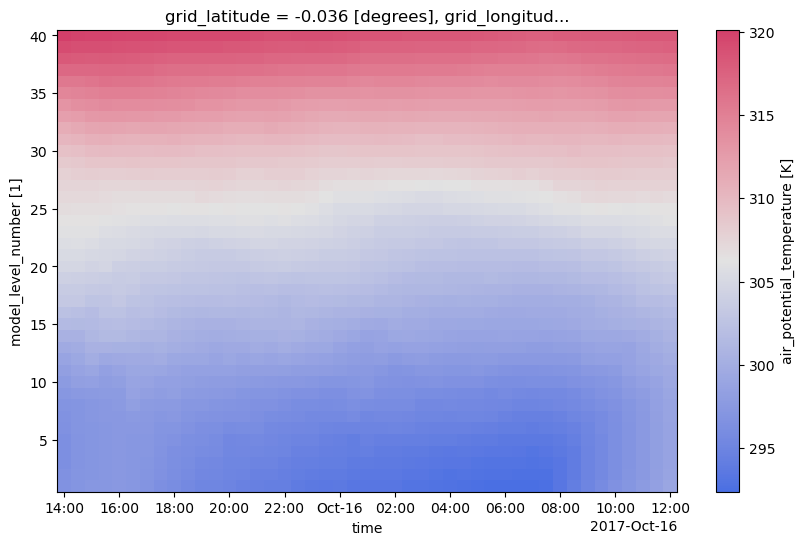

In [72]:
um.air_potential_temperature.isel(model_level_number = np.arange(0, 40)).plot(x = "time", y = "model_level_number", 
                                                                                      figsize=(10, 6), cmap = pal1.cmap()) 


In [133]:
um_pot_temp = um.air_potential_temperature.isel(model_level_number=np.arange(0, 50))

In [138]:
um_pot_temp.isel(time=slice(0, 100))

<xarray.DataArray 'air_potential_temperature' (time: 45, model_level_number: 50)> Size: 9kB
array([[296.625, 296.5  , 296.375, ..., 325.875, 326.375, 327.125],
       [297.   , 297.   , 296.875, ..., 325.75 , 326.375, 327.125],
       [297.25 , 297.125, 297.125, ..., 325.625, 326.25 , 327.   ],
       ...,
       [297.75 , 297.5  , 297.5  , ..., 323.875, 324.5  , 325.25 ],
       [298.375, 298.25 , 298.125, ..., 323.875, 324.5  , 325.25 ],
       [299.   , 298.875, 298.75 , ..., 323.75 , 324.375, 325.125]],
      dtype=float32)
Coordinates:
  * time                     (time) datetime64[ns] 360B 2017-10-15T14:00:00 ....
  * model_level_number       (model_level_number) int32 200B 1 2 3 ... 48 49 50
    grid_latitude            float32 4B -0.036
    grid_longitude           float64 8B 360.0
    forecast_period          (time) timedelta64[ns] 360B ...
    forecast_reference_time  datetime64[ns] 8B 2017-10-15T12:00:00
    level_height             (model_level_number) float32 200B ...
    projection_x_coordinate  float64 8B 11.4
    projection_y_coordinate  float64 8B 47.26
    sigma                    (model_level_number) float32 200B ...
Attributes:
    standard_name:    air_potential_temperature
    units:            K
    um_stash_source:  m01s00i004
    grid_mapping:     rotated_latitude_longitude

Text(0.5, 0, '')

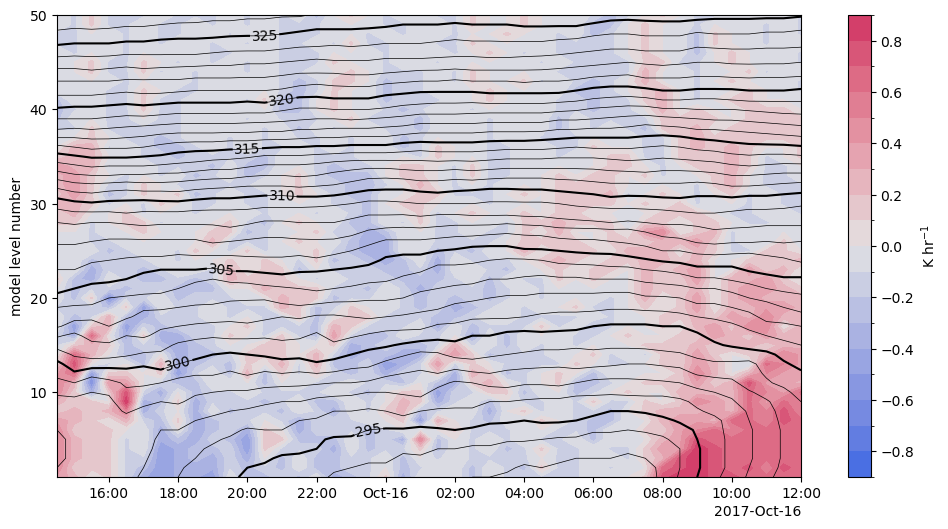

In [139]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours
contourf = um_pot_temp.diff("time").plot.contourf(ax=ax, x="time", y="model_level_number", levels=20,
                                     cmap=pal1.cmap(), add_colorbar=False)

# Plot the contour lines
contour1 = um_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="model_level_number", 
                                   levels=np.arange(np.round(um_pot_temp.min()), np.round(um_pot_temp.max()), 1), 
                                   colors='black', linewidths=0.5)
contour5 = um_pot_temp.isel(time=slice(1, 100)).plot.contour(ax=ax, x="time", y="model_level_number", 
                                   levels=np.arange(295, np.round(um_pot_temp.max()), 5), 
                                   colors='black', linewidths=1.5)
ax.clabel(contour5)
# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('K hr$^{-1}$')
ax.set_title("")
ax.set_ylabel("model level number"); ax.set_xlabel("")

# WRF

In [5]:
wrf = read_wrf_helen.read_wrf_fixed_point(lat=lat_ibk, lon=lon_ibk)

Variable 'time' does not have valid units and will not be quantified.


In [6]:
wrf

<xarray.Dataset> Size: 188kB
Dimensions:            (Time: 45, bottom_top: 80)
Coordinates:
  * Time               (Time) datetime64[ns] 360B 2017-10-15T14:00:00 ... 201...
Dimensions without coordinates: bottom_top
Data variables: (12/13)
    u                  (Time, bottom_top) float32 14kB 0.6612 0.9272 ... 1.36
    v                  (Time, bottom_top) float32 14kB 0.5573 0.6314 ... -0.8804
    z                  (Time, bottom_top) float32 14kB 590.5 612.0 ... 2.16e+04
    th                 (Time, bottom_top) float32 14kB 301.6 301.8 ... 515.0
    p                  (Time, bottom_top) float32 14kB 9.563e+04 ... 4.283e+03
    q_mixingratio      (Time, bottom_top) float32 14kB 0.005811 ... 2.886e-06
    ...                 ...
    temperature        (Time, bottom_top) float32 14kB 24.66 24.61 ... -63.78
    relative_humidity  (Time, bottom_top) float32 14kB 28.51 28.6 ... 1.721
    dewpoint           (Time, bottom_top) float32 14kB 5.213 5.213 ... -89.85
    specific_humidity  (Time, bottom_top) float32 14kB 5.777 5.792 ... 0.002886
    ff                 (Time, bottom_top) float32 14kB 0.8647 1.122 ... 1.62
    dd                 (Time, bottom_top) float32 14kB 229.9 235.7 ... 302.9

In [19]:
wrf_pot_temp = wrf.th.isel(bottom_top=slice(0, 50))

Text(0.5, 0, '')

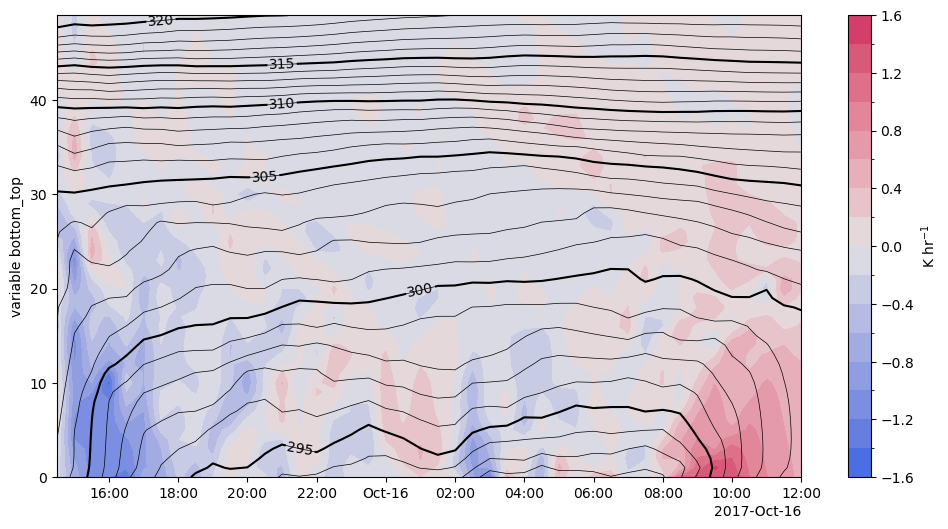

In [22]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours
contourf = wrf_pot_temp.diff("Time").plot.contourf(ax=ax, x="Time", y="bottom_top", levels=20,
                                     cmap=pal1.cmap(), add_colorbar=False)

# Plot the contour lines
contour1 = wrf_pot_temp.isel(Time=slice(1, 100)).plot.contour(ax=ax, x="Time", y="bottom_top", 
                                   levels=np.arange(np.round(wrf_pot_temp.min()), np.round(wrf_pot_temp.max()), 1), 
                                   colors='black', linewidths=0.5)
contour5 = wrf_pot_temp.isel(Time=slice(1, 100)).plot.contour(ax=ax, x="Time", y="bottom_top", 
                                   levels=np.arange(295, np.round(wrf_pot_temp.max()), 5), 
                                   colors='black', linewidths=1.5)
ax.clabel(contour5)
# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label('K hr$^{-1}$')
ax.set_title("")
ax.set_ylabel("variable bottom_top"); ax.set_xlabel("")

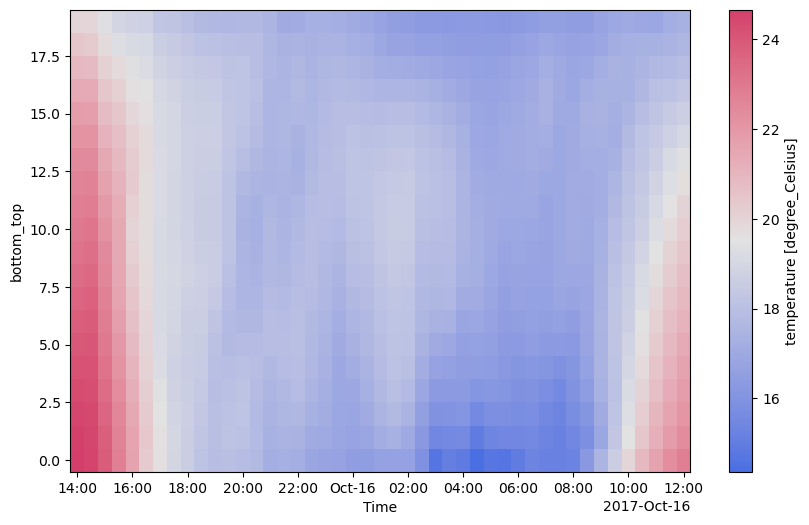

In [64]:
wrf.temperature.isel(bottom_top=np.arange(0, 20)).plot(x="Time", y = "bottom_top", figsize=(10,6), cmap = pal1.cmap())

In [4]:
ds = read_wrf_helen.read_wrf_fixed_time(my_time="2017-10-15T14:00:00", min_lon=10, max_lon=13, min_lat=46, max_lat=50,
                         lowest_level=True)

In [5]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:        (south_north: 362, west_east: 231)
Coordinates:
  * west_east      (west_east) float64 2kB -1.07e+05 -1.06e+05 ... 1.23e+05
  * south_north    (south_north) float64 3kB -1.42e+05 -1.41e+05 ... 2.19e+05
Data variables:
    u              (south_north, west_east) float32 334kB ...
    v              (south_north, west_east) float32 334kB ...
    z              (south_north, west_east) float32 334kB ...
    th             (south_north, west_east) float32 334kB ...
    p              (south_north, west_east) float32 334kB ...
    alb            (south_north, west_east) float32 334kB ...
    q_mixingratio  (south_north, west_east) float32 334kB ...
Attributes: (12/137)
    TITLE:                            OUTPUT FROM WRF V4.4.1 MODEL
    START_DATE:                      2017-10-15_12:00:00
    SIMULATION_START_DATE:           2017-10-15_12:00:00
    WEST-EAST_GRID_DIMENSION:        800
    SOUTH-NORTH_GRID_DIMENSION:      440
    BOTTOM-TOP_GRID_DIMENSION:       81
    ...                              ...
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Mon Jun 10 13:52:33 2024: ncks -x -v CLD...
    NCO:                             4.4.8
    pyproj_srs:                      +proj=lcc +lat_0=47.3000068664551 +lon_0...